In [106]:
#importing the required liraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.mixture import GaussianMixture
from scipy import stats
from scipy.stats import mstats
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.cluster import KMeans
from shapely.geometry import LineString, MultiPolygon, MultiPoint, Point
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d


In [83]:
#downloading the iris dataset
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_data=pd.DataFrame(data=iris.data, columns = feature_names)
iris_data['target']=iris.target
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [102]:
#using GMM to seperate the clusters
gmm=GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)
iris_data['gmm_cluster']=gmm_cluster_labels
iris_data['target']=iris.target
print(gmm_cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [103]:
#printing the count of each value in the clusters
iris_result = iris_data.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


In [86]:
#Reporting the value of np.sum(y_pred==y) / len(y_pred)
np.sum(iris_data['gmm_cluster']==iris_data['target'])/len(iris_data['gmm_cluster'])


0.9666666666666667

In [87]:
#fitting the data in the model
gmm.fit(iris_data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [88]:
#picking the most common class for each cluster from the mode displayed above
iris_data[iris_data['target']==0]=iris_data[iris_data['target']==0].replace(iris_data['gmm_cluster'],0)
iris_data[iris_data['target']==1]=iris_data[iris_data['target']==1].replace(iris_data['gmm_cluster'],1)
iris_data[iris_data['target']==2]=iris_data[iris_data['target']==2].replace(iris_data['gmm_cluster'],2)

In [89]:
#mapping each cluster to a class
d0 = iris_data[iris_data['gmm_cluster']== 0]
d1 = iris_data[iris_data['gmm_cluster']== 1]
d2 = iris_data[iris_data['gmm_cluster']== 2]

In [90]:
iris_data[iris_data['target']==1].gmm_cluster=1

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [104]:
#generating blobs using make_blobs with desired parameters
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X,y = make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std,random_state=0)

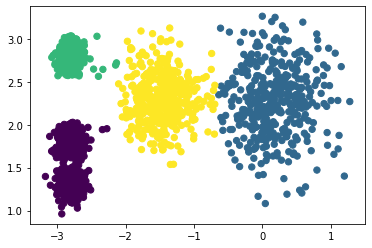

In [92]:
# plotting the blobs
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [93]:
#training k-means on this dataset
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
#printing the value of the centroids
centers=kmeans.cluster_centers_
print(centers)

[[-1.46332098  2.31083369]
 [-2.80446936  1.79959228]
 [ 0.17864202  2.27506362]
 [-2.80180006  2.79464334]
 [-2.80379109  1.30017997]]


In [105]:
#predicting labels for new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
print(kmeans.predict(X_new))

[2 2 3 3]


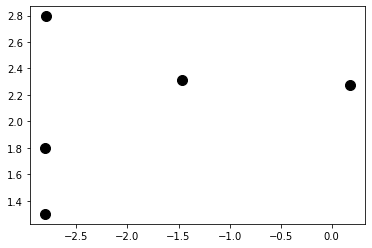

In [95]:
#plotting the centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1, label = "Centroids")

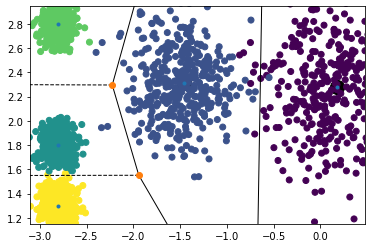

In [96]:
#plotitngthe decision boundaries, centroids, blobs using a voronoi plot
vor=Voronoi(centers)
voronoi_plot_2d(vor)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1)
plt.scatter(X[:,0],X[:,1], c=y);


In [97]:
#Clustering using k=3
print("k=3")
model1 = KMeans(n_clusters=3)
y_pred1 = model1.fit_predict(X)
centers1 = model1.cluster_centers_
print(centers1)
print(y_pred[5:10])

k=3
[[-2.19950674  2.56899558]
 [ 0.0771363   2.27284941]
 [-2.8047944   1.55187579]]
[2 2 0 1 1]


In [98]:
#Clustering using k=8
print("k=8")
model2 = KMeans(n_clusters=8)
y_pred2 = model2.fit_predict(X)
centers2 = model2.cluster_centers_
print(centers2)
print(y_pred2[5:10])

k=8
[[-2.80446936  1.79959228]
 [ 0.02380348  1.90066339]
 [-1.32948457  2.47721989]
 [-2.80180006  2.79464334]
 [-2.80379109  1.30017997]
 [ 0.60361138  2.3713124 ]
 [-0.05788563  2.60445123]
 [-1.62545081  2.11673761]]
[4 4 3 5 2]


Inertia depicts how well the data is clustered. It can be observed that as k increases Inertia decreases.
So, both inertia and K are inversely proportional


In [99]:
#Comparing the Interia for k=3 and k=8
print("Inertia for k=3: ",model1.inertia_)
print("Inertia for k=8: ",model2.inertia_)

Inertia for k=3:  646.230269055688
Inertia for k=8:  121.50628972016145


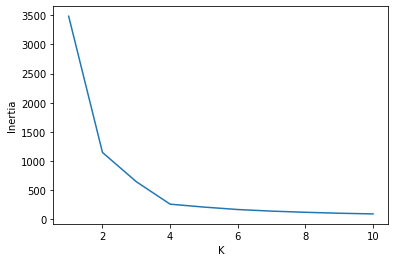

In [107]:
#plotting inertia as a function of k using an elbow plot
wcss = [] 
for i in range(1, 11):
    kmeans_new = KMeans(n_clusters = i, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
    kmeans_new.fit(X)
    wcss.append(kmeans_new.inertia_)
    #Using elbow method to finnd optimal solution
plt.plot(range(1, 11), wcss)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

The value of k at elbow is 4

#### **END OF CODE**
